In [1]:
import numpy as np
from cleanlab import Datalab
import datasets

In [2]:
features = np.load("data/features.npy")
pred_probs = np.load("data/pred_probs.npy")

In [3]:
dataset_hf = datasets.load_dataset("imagefolder", data_dir="./data/caltech256-subset", split="train")

Resolving data files:   0%|          | 0/635 [00:00<?, ?it/s]

Found cached dataset imagefolder (/Users/sanjana/.cache/huggingface/datasets/imagefolder/default-2f665a6adeec287e/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


## Run default Datalab checks

In [4]:
lab = Datalab(data=dataset_hf, label_name="label")
lab.find_issues(features=features, pred_probs=pred_probs)

Finding label issues ...


2023-05-04 08:11:19.798353: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Finding outlier issues ...
Fitting OOD estimator based on provided features ...
Finding near_duplicate issues ...

Audit complete. 50 issues found in the dataset.


In [5]:
lab.report(include_description=False)

Here is a summary of the different kinds of issues found in the data:

    issue_type    score  num_issues
       outlier 0.735523          25
near_duplicate 0.244542          14
         label 0.982677          11

(Note: A lower score indicates a more severe issue across all examples in the dataset.)

Dataset Information: num_examples: 635, num_classes: 5
---------------------- outlier issues ----------------------

Number of examples with this issue: 25
Overall dataset quality in terms of this issue: 0.7355

Examples representing most severe instances of this issue:
     is_outlier_issue  outlier_score  nearest_neighbor  distance_to_nearest_neighbor
398              True       0.412073               257                      0.848089
397              True       0.420990               149                      0.845467
633              True       0.425188               396                      0.846003
241              True       0.427850               119                      0.817756

## Run specific Datalab check

In [6]:
lab = Datalab(data=dataset_hf, label_name="label")
lab.find_issues(features=features, pred_probs=pred_probs, issue_types={"label": {}})

Finding label issues ...

Audit complete. 11 issues found in the dataset.


In [7]:
lab.report(include_description=False)

Here is a summary of the different kinds of issues found in the data:

issue_type    score  num_issues
     label 0.982677          11

(Note: A lower score indicates a more severe issue across all examples in the dataset.)

Dataset Information: num_examples: 635, num_classes: 5
----------------------- label issues -----------------------

Number of examples with this issue: 11
Overall dataset quality in terms of this issue: 0.9827

Examples representing most severe instances of this issue:
     is_label_issue  label_score given_label predicted_label
539            True     0.022090    256.toad        080.frog
9              True     0.022368    080.frog        256.toad
44             True     0.025305    080.frog        256.toad
611            True     0.040939    256.toad        080.frog
98            False     0.043375    080.frog        207.swan


## Run Datalab with empty issue_types dict

In [8]:
lab = Datalab(data=dataset_hf, label_name="label")
lab.find_issues(issue_types={})

/Users/sanjana/cleanlab_home/fork_cleanlab/cleanlab/datalab/datalab.py:275: UserWarning: No issue types were specified. No issues will be found in the dataset.
  warnings.warn("No issue types were specified. No issues will be found in the dataset.")


In [9]:
lab.report()

Please specify some issue types to run in datalab.find_issues() to see the report.

Dataset Information: num_examples: 635, num_classes: 5



## Run default cleanvision issues

In [10]:
lab = Datalab(data=dataset_hf, label_name="label", image_key="image")
lab.find_issues()

Finding dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale images ...


/Users/sanjana/cleanlab_home/fork_cleanlab/cleanlab/datalab/datalab.py:279: UserWarning: No arguments were passed to Datalab.find_issues().
  warnings.warn("No arguments were passed to Datalab.find_issues().")
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 635/635 [00:03<00:00, 165.81it/s]



Audit complete. 20 issues found in the dataset.


Here is a summary of the different kinds of issues found in the data:

      issue_type  score num_issues
exact_duplicates    NaN          8
            dark    NaN          4
 near_duplicates    NaN          4
 low_information    NaN          2
          blurry    NaN          1
odd_aspect_ratio    NaN          1
       grayscale    NaN          0
           light    NaN          0

(Note: A lower score indicates a more severe issue across all examples in the dataset.)

Dataset Information: num_examples: 635, num_classes: 5

----------------- exact_duplicates images ------------------

Number of examples with this issue: 8
Examples representing most severe instances of this issue:

Set: 0


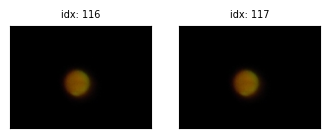

Set: 1


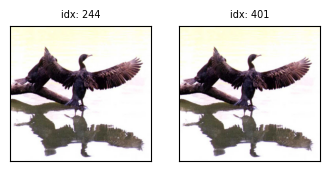

Set: 2


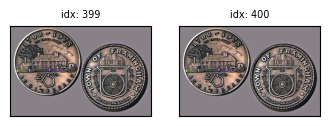

Set: 3


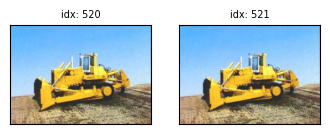

----------------------- dark images ------------------------

Number of examples with this issue: 4
Examples representing most severe instances of this issue:



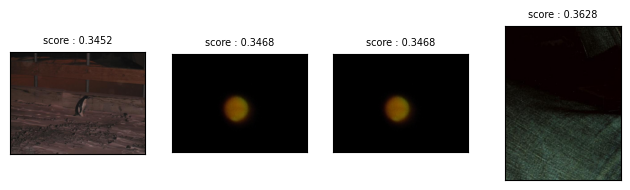

------------------ near_duplicates images ------------------

Number of examples with this issue: 4
Examples representing most severe instances of this issue:

Set: 0


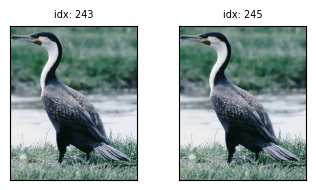

Set: 1


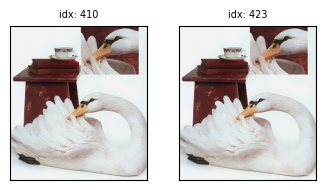

------------------ low_information images ------------------

Number of examples with this issue: 2
Examples representing most severe instances of this issue:



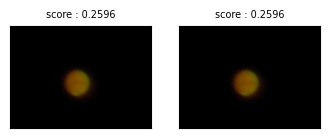

---------------------- blurry images -----------------------

Number of examples with this issue: 1
Examples representing most severe instances of this issue:



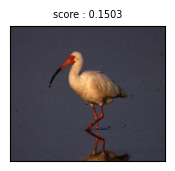

----------------- odd_aspect_ratio images ------------------

Number of examples with this issue: 1
Examples representing most severe instances of this issue:



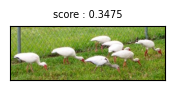

In [11]:
lab.report(include_description=False)

## Run specific cleanvision check

In [12]:
lab = Datalab(data=dataset_hf, label_name="label", image_key="image")
lab.find_issues(issue_types={"image_issue_types": {"dark": {}}})

Finding dark images ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 635/635 [00:07<00:00, 90.65it/s]


Audit complete. 4 issues found in the dataset.


Here is a summary of the different kinds of issues found in the data:

issue_type  score num_issues
      dark    NaN          4

(Note: A lower score indicates a more severe issue across all examples in the dataset.)

Dataset Information: num_examples: 635, num_classes: 5

----------------------- dark images ------------------------

Number of examples with this issue: 4
Examples representing most severe instances of this issue:



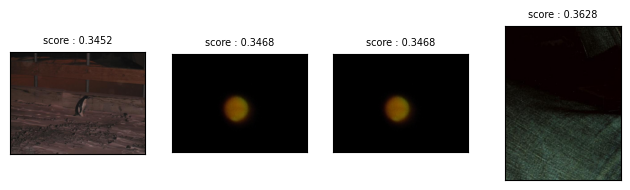

In [13]:
lab.report(include_description=False)

## Run cleanvision issue with custom hyperparameters

In [14]:
lab = Datalab(data=dataset_hf, label_name="label", image_key="image")
lab.find_issues(issue_types={"image_issue_types": {"dark": {"threshold": 0.36}}})

Finding dark images ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 635/635 [00:07<00:00, 90.49it/s]


Audit complete. 3 issues found in the dataset.


Here is a summary of the different kinds of issues found in the data:

issue_type  score num_issues
      dark    NaN          3

(Note: A lower score indicates a more severe issue across all examples in the dataset.)

Dataset Information: num_examples: 635, num_classes: 5

----------------------- dark images ------------------------

Number of examples with this issue: 3
Examples representing most severe instances of this issue:



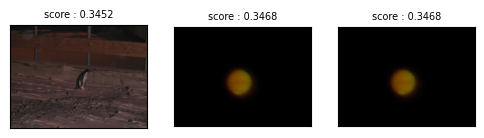

In [15]:
lab.report(include_description=False)

## Run Datalab and cleanvision default checks

In [16]:
lab = Datalab(data=dataset_hf, label_name="label", image_key="image")
lab.find_issues(features=features, pred_probs=pred_probs)

Finding label issues ...
Finding outlier issues ...
Fitting OOD estimator based on provided features ...
Finding near_duplicate issues ...
Finding dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale images ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 635/635 [00:03<00:00, 167.19it/s]



Audit complete. 70 issues found in the dataset.


Here is a summary of the different kinds of issues found in the data:

      issue_type    score num_issues
         outlier 0.735523         25
  near_duplicate 0.244542         14
           label 0.982677         11
exact_duplicates      NaN          8
            dark      NaN          4
 near_duplicates      NaN          4
 low_information      NaN          2
          blurry      NaN          1
odd_aspect_ratio      NaN          1
       grayscale      NaN          0
           light      NaN          0

(Note: A lower score indicates a more severe issue across all examples in the dataset.)

Dataset Information: num_examples: 635, num_classes: 5
---------------------- outlier issues ----------------------

Number of examples with this issue: 25
Overall dataset quality in terms of this issue: 0.7355

Examples representing most severe instances of this issue:
     is_outlier_issue  outlier_score  nearest_neighbor  distance_to_nearest_neighbor
398              True       0.412073   

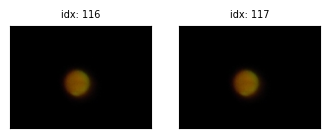

Set: 1


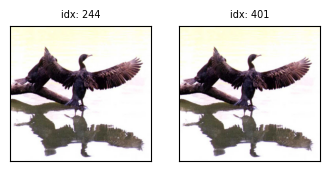

Set: 2


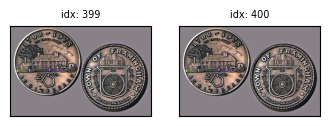

Set: 3


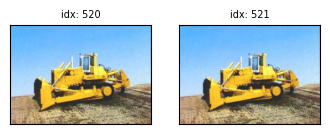

----------------------- dark images ------------------------

Number of examples with this issue: 4
Examples representing most severe instances of this issue:



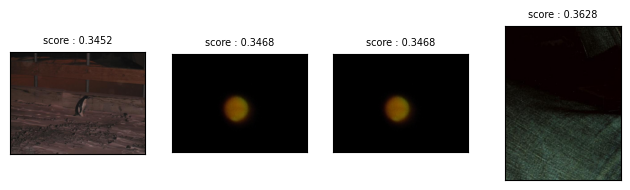

------------------ near_duplicates images ------------------

Number of examples with this issue: 4
Examples representing most severe instances of this issue:

Set: 0


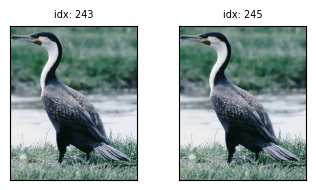

Set: 1


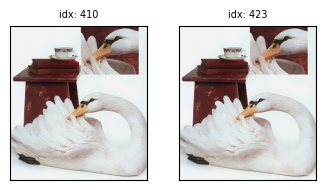

------------------ low_information images ------------------

Number of examples with this issue: 2
Examples representing most severe instances of this issue:



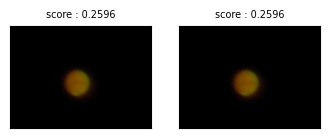

---------------------- blurry images -----------------------

Number of examples with this issue: 1
Examples representing most severe instances of this issue:



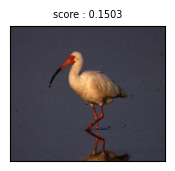

----------------- odd_aspect_ratio images ------------------

Number of examples with this issue: 1
Examples representing most severe instances of this issue:



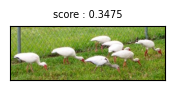

In [17]:
lab.report(include_description=False)

## Run specific Datalab and cleanvision issues

In [18]:
lab = Datalab(data=dataset_hf, label_name="label", image_key="image")
lab.find_issues(features=features, pred_probs=pred_probs, issue_types={"label": {}, "image_issue_types": {"dark": {}}})

Finding label issues ...
Finding dark images ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 635/635 [00:07<00:00, 84.28it/s]


Audit complete. 15 issues found in the dataset.


Here is a summary of the different kinds of issues found in the data:

issue_type    score num_issues
     label 0.982677         11
      dark      NaN          4

(Note: A lower score indicates a more severe issue across all examples in the dataset.)

Dataset Information: num_examples: 635, num_classes: 5
----------------------- label issues -----------------------

Number of examples with this issue: 11
Overall dataset quality in terms of this issue: 0.9827

Examples representing most severe instances of this issue:
     is_label_issue  label_score given_label predicted_label
539            True     0.022090    256.toad        080.frog
9              True     0.022368    080.frog        256.toad
44             True     0.025305    080.frog        256.toad
611            True     0.040939    256.toad        080.frog
98            False     0.043375    080.frog        207.swan
----------------------- dark images ------------------------

Number of examples with this issue: 4
Examples 

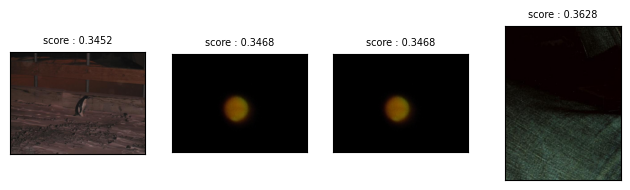

In [19]:
lab.report(include_description=False)

## Incremental search

In [20]:
lab = Datalab(data=dataset_hf, label_name="label", image_key="image")
lab.find_issues(features=features, pred_probs=pred_probs, issue_types={"label": {}})

Finding label issues ...

Audit complete. 11 issues found in the dataset.


In [21]:
lab.report(include_description=False)

Here is a summary of the different kinds of issues found in the data:

issue_type    score  num_issues
     label 0.982677          11

(Note: A lower score indicates a more severe issue across all examples in the dataset.)

Dataset Information: num_examples: 635, num_classes: 5
----------------------- label issues -----------------------

Number of examples with this issue: 11
Overall dataset quality in terms of this issue: 0.9827

Examples representing most severe instances of this issue:
     is_label_issue  label_score given_label predicted_label
539            True     0.022090    256.toad        080.frog
9              True     0.022368    080.frog        256.toad
44             True     0.025305    080.frog        256.toad
611            True     0.040939    256.toad        080.frog
98            False     0.043375    080.frog        207.swan


In [22]:
lab.find_issues(features=features, pred_probs=pred_probs, issue_types={"image_issue_types": {"near_duplicates": {}}})

Finding near_duplicates images ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 635/635 [00:04<00:00, 148.20it/s]


Audit complete. 15 issues found in the dataset.


Here is a summary of the different kinds of issues found in the data:

     issue_type    score num_issues
          label 0.982677         11
near_duplicates      NaN          4

(Note: A lower score indicates a more severe issue across all examples in the dataset.)

Dataset Information: num_examples: 635, num_classes: 5
----------------------- label issues -----------------------

Number of examples with this issue: 11
Overall dataset quality in terms of this issue: 0.9827

Examples representing most severe instances of this issue:
     is_label_issue  label_score given_label predicted_label
539            True     0.022090    256.toad        080.frog
9              True     0.022368    080.frog        256.toad
44             True     0.025305    080.frog        256.toad
611            True     0.040939    256.toad        080.frog
98            False     0.043375    080.frog        207.swan
------------------ near_duplicates images ------------------

Number of examples with this iss

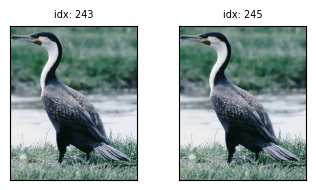

Set: 1


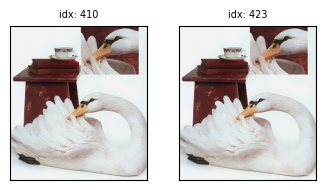

In [23]:
lab.report(include_description=False)

In [24]:
lab.find_issues(features=features, pred_probs=pred_probs, issue_types={"near_duplicate": {}})

Finding near_duplicate issues ...

Audit complete. 29 issues found in the dataset.


Here is a summary of the different kinds of issues found in the data:

     issue_type    score num_issues
 near_duplicate 0.244542         14
          label 0.982677         11
near_duplicates      NaN          4

(Note: A lower score indicates a more severe issue across all examples in the dataset.)

Dataset Information: num_examples: 635, num_classes: 5
------------------ near_duplicate issues -------------------

Number of examples with this issue: 14
Overall dataset quality in terms of this issue: 0.2445

Examples representing most severe instances of this issue:
     is_near_duplicates_issue  is_near_duplicate_issue  near_duplicate_score near_duplicate_sets  distance_to_nearest_neighbor
116                     False                     True                   0.0               [117]                           0.0
521                     False                     True                   0.0               [520]                           0.0
520                     False              

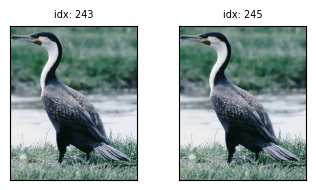

Set: 1


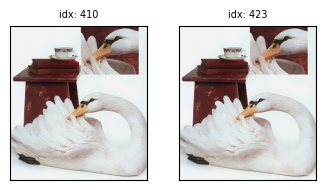

In [25]:
lab.report(include_description=False)

Finding outlier issues ...
Fitting OOD estimator based on provided features ...

Audit complete. 50 issues found in the dataset.
Here is a summary of the different kinds of issues found in the data:

     issue_type    score num_issues
        outlier 0.706262         21
 near_duplicate 0.244542         14
          label 0.982677         11
near_duplicates      NaN          4

(Note: A lower score indicates a more severe issue across all examples in the dataset.)

Dataset Information: num_examples: 635, num_classes: 5
---------------------- outlier issues ----------------------

About this issue:
	Examples that are very different from the rest of the dataset 
    (i.e. potentially out-of-distribution or rare/anomalous instances).
    

Number of examples with this issue: 21
Overall dataset quality in terms of this issue: 0.7063

Examples representing most severe instances of this issue:
     is_outlier_issue  outlier_score  nearest_neighbor  distance_to_nearest_neighbor
398           

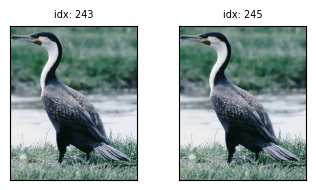

Set: 1


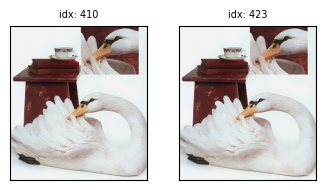

In [26]:
lab.find_issues(features=features, issue_types={"outlier": {"k": 30}})
lab.report()

Here is a summary of the different kinds of issues found in the data:

     issue_type    score num_issues
        outlier 0.706262         21
 near_duplicate 0.244542         14
          label 0.982677         11
near_duplicates      NaN          4

(Note: A lower score indicates a more severe issue across all examples in the dataset.)

Dataset Information: num_examples: 635, num_classes: 5
---------------------- outlier issues ----------------------

Number of examples with this issue: 21
Overall dataset quality in terms of this issue: 0.7063

Examples representing most severe instances of this issue:
     is_outlier_issue  outlier_score  nearest_neighbor  distance_to_nearest_neighbor
398              True       0.405335               257                      0.848089
397              True       0.416385               149                      0.845467
117              True       0.416809               116                      0.000000
116              True       0.416809            

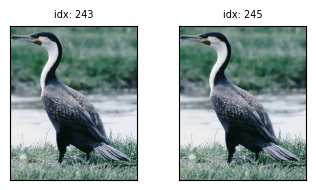

Set: 1


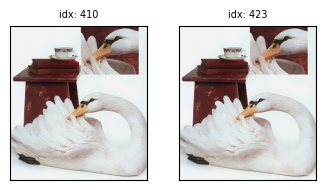

In [27]:
lab.report(num_examples=10, verbosity=2, include_description=False)